In [110]:
! python3 -m pip install --upgrade pip
! python3 -m pip install  --upgrade SpeechRecognition
! python3 -m pip install  --upgrade pydub

In [111]:
import IPython.display as ipd
import librosa
import librosa.display
import kapre
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import pandas as pd
import random
import re
import shutil
import speech_recognition as sr
import tensorflow as tf
from os import listdir
from os.path import isfile, join
from os import path
from plotnine import *
from pydub import AudioSegment

# Transcribe audio data to txt data

In [112]:
# TODO make an input from user
data_path = '/tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train'

audio_path_cc = data_path + '/Full_wave_enhanced_audio/cc/'
audio_path_cd = data_path + '/Full_wave_enhanced_audio/cd/'


text_path_cc = data_path + '/transcription/cc/'
text_path_cd = data_path + '/transcription/cd/'

lang_ = 'en-US'

r = sr.Recognizer()

In [113]:
def startConversion(path, filename, lang = lang_):
                
    # Create output file name
    output_dir = path + 'output_text/'
    output_file = '.'.join(filename.split(sep='.')[:-1]) + '.txt'
    output_file_path = output_dir + output_file
    
    # If output file does not exist, continue
    if os.path.exists(output_test_file_path):
        print("Sorry, " + output_test_file_path + " already exists")
    else:
        full_path = path + filename

        with sr.AudioFile(full_path) as source:
            print('Transcribing file: ' + str(filename) + ' in path: ' + str(full_path))
            audio_text = r.listen(source)
            # recognize_() method will throw a request error if the API is unreachable, hence using exception handling
            try:

                # using google speech recognition
                # print('Converting audio transcripts into text ...')
                text = r.recognize_google(audio_text)

                # Create output directory
                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)

                with open(output_file_path, 'w') as f:
                    f.write(text)
                print('Finished transcribing text file ' + str(output_file) + ' at location ' + output_file_path)

            except Exception as e:
                print('Error: ' + str(e) + ' <- this guy')

In [114]:
# Running for CC path
onlyfiles = [f for f in listdir(audio_path_cc) if isfile(join(audio_path_cc, f))]

for filename in onlyfiles:
    startConversion(path = audio_path_cc, filename = filename)

Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/A

In [115]:
# Running for CD path
onlyfiles = [f for f in listdir(audio_path_cd) if isfile(join(audio_path_cd, f))]

for filename in onlyfiles:
    startConversion(path = audio_path_cd, filename = filename)

Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/A

# EDA

In [116]:
# Running for CC path
audio_cc_text_path = audio_path_cc + 'output_text/'
onlytextfiles = [f for f in listdir(audio_cc_text_path) if isfile(join(audio_cc_text_path, f))]

# Create output directory
audio_cc_clean_text_path_dir = audio_cc_text_path + 'output_text_clean/'
if not os.path.exists(audio_cc_clean_text_path_dir):
    os.makedirs(audio_cc_clean_text_path_dir)

for filename in onlytextfiles:
    output_clean_text_file_path = audio_cc_clean_text_path_dir + filename
    if os.path.exists(output_clean_text_file_path):
        print("Sorry, " + output_test_file_path + " already exists")
    else:    
        print("Cleaning up: " + str(filename))
        full_text_file_path = audio_cc_text_path + filename

        # Make all text lowercase
        # Remove special characters
        file = open(full_text_file_path, 'r')

        lines = [re.sub('[^a-zA-Z0-9\s\.]','',line.lower()) for line in file]    
        with open(output_clean_text_file_path, 'w') as out:
             out.writelines(sorted(lines))
print("Done!")

Cleaning up: S001.txt
Cleaning up: S002.txt
Cleaning up: S003.txt
Cleaning up: S004.txt
Cleaning up: S009.txt
Cleaning up: S011.txt
Cleaning up: S012.txt
Cleaning up: S013.txt
Cleaning up: S015.txt
Cleaning up: S016.txt
Cleaning up: S017.txt
Cleaning up: S018.txt
Cleaning up: S019.txt
Cleaning up: S020.txt
Cleaning up: S021.txt
Cleaning up: S024.txt
Cleaning up: S025.txt
Cleaning up: S027.txt
Cleaning up: S028.txt
Cleaning up: S029.txt
Cleaning up: S030.txt
Cleaning up: S032.txt
Cleaning up: S033.txt
Cleaning up: S034.txt
Cleaning up: S035.txt
Cleaning up: S036.txt
Cleaning up: S038.txt
Cleaning up: S039.txt
Cleaning up: S040.txt
Cleaning up: S041.txt
Cleaning up: S043.txt
Cleaning up: S048.txt
Cleaning up: S051.txt
Cleaning up: S052.txt
Cleaning up: S055.txt
Cleaning up: S056.txt
Cleaning up: S058.txt
Cleaning up: S059.txt
Cleaning up: S061.txt
Cleaning up: S062.txt
Cleaning up: S063.txt
Cleaning up: S064.txt
Cleaning up: S067.txt
Cleaning up: S068.txt
Cleaning up: S070.txt
Cleaning u

In [117]:
# Running for CD path
audio_cd_text_path = audio_path_cd + 'output_text/'
onlytextfiles = [f for f in listdir(audio_cd_text_path) if isfile(join(audio_cd_text_path, f))]

# Create output directory
audio_cd_clean_text_path_dir = audio_cd_text_path + 'output_text_clean/'
if not os.path.exists(audio_cd_clean_text_path_dir):
    os.makedirs(audio_cd_clean_text_path_dir)

for filename in onlytextfiles:
    output_clean_text_file_path = audio_cd_clean_text_path_dir + filename
    if os.path.exists(output_clean_text_file_path):
        print("Sorry, " + output_test_file_path + " already exists")
    else:     
        print("Cleaning up: " + str(filename))
        full_text_file_path = audio_cd_text_path + filename

        # Make all text lowercase
        # Remove special characters
        file = open(full_text_file_path, 'r')

        lines = [re.sub('[^a-zA-Z0-9\s\.]','',line.lower()) for line in file]
        with open(output_clean_text_file_path, 'w') as out:
             out.writelines(sorted(lines))
print("Done!")

Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/A

# Split dataset

In [118]:
# Create output directories
audio_cc_clean_text_path_dir_train = audio_cc_clean_text_path_dir + 'train/'
audio_cc_clean_text_path_dir_test = audio_cc_clean_text_path_dir + 'test/'
if not os.path.exists(audio_cc_clean_text_path_dir_train):
    os.makedirs(audio_cc_clean_text_path_dir_train)
if not os.path.exists(audio_cc_clean_text_path_dir_test):
    os.makedirs(audio_cc_clean_text_path_dir_test)

# Get count of files
num_files_cc = len([name for name in os.listdir(audio_cc_clean_text_path_dir) if os.path.isfile(os.path.join(audio_cc_clean_text_path_dir, name))])

# Set count of training data
num_train_data = int(.8*num_files_cc)
count_train_data = 0

# Place in train (80%)
while count_train_data < num_train_data:
    train_files = [f for f in listdir(audio_cc_clean_text_path_dir) if isfile(join(audio_cc_clean_text_path_dir, f))]
    # Draw a random file
    train_file = random.choice(train_files)
    print(train_file + " goes to training dataset")
    original_path = audio_cc_clean_text_path_dir + train_file
    new_path = audio_cc_clean_text_path_dir_train + train_file
    # Move file to training
    shutil.move(original_path,new_path)
    count_train_data = count_train_data + 1
    
# Place remainder (20%) in test
test_files = [f for f in listdir(audio_cc_clean_text_path_dir) if isfile(join(audio_cc_clean_text_path_dir, f))]

for test_file in test_files:
    print(test_file + " goes to test dataset")
    original_path = audio_cc_clean_text_path_dir + test_file
    new_path = audio_cc_clean_text_path_dir_test + test_file
    # Move file to test
    shutil.move(original_path,new_path)

S048.txt goes to training dataset
S071.txt goes to training dataset
S041.txt goes to training dataset
S035.txt goes to training dataset
S028.txt goes to training dataset
S059.txt goes to training dataset
S063.txt goes to training dataset
S058.txt goes to training dataset
S016.txt goes to training dataset
S036.txt goes to training dataset
S051.txt goes to training dataset
S013.txt goes to training dataset
S027.txt goes to training dataset
S062.txt goes to training dataset
S068.txt goes to training dataset
S064.txt goes to training dataset
S073.txt goes to training dataset
S034.txt goes to training dataset
S033.txt goes to training dataset
S001.txt goes to training dataset
S021.txt goes to training dataset
S070.txt goes to training dataset
S061.txt goes to training dataset
S076.txt goes to training dataset
S015.txt goes to training dataset
S024.txt goes to training dataset
S040.txt goes to training dataset
S025.txt goes to training dataset
S032.txt goes to training dataset
S067.txt goes 

# Vectorize data

In [119]:
! python3 -m pip install  --upgrade sklearn

In [125]:
# Vectorizer inspired by https://melaniewalsh.github.io/Intro-Cultural-Analytics/Text-Analysis/TF-IDF-Scikit-Learn.html#:~:text=Run%20TfidfVectorizer%20on%20our%20text_files%20tfidf_vector%20=%20tfidf_vectorizer,words%20as%20columns%20and%20the%20titles%20as%20rows
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.mixture import GaussianMixture as GMM
import pandas as pd
import numpy as np
from pathlib import Path  
import glob

### Training data

In [121]:
# Get a list of all the filepaths for the text files in this directory
train_text_files = glob.glob(f"{audio_cc_clean_text_path_dir_train}/*.txt")
# train_text_files

# Get the titles of each text file (to be used for rows in our dataframe later)
train_text_titles = [Path(text).stem for text in train_text_files]
# train_text_titles

In [136]:
# Vectorize the text data into numbers
# TODO change so it is not hardcoded to English but can take any language
train_tfidf_vectorizer  = TfidfVectorizer(input='filename', stop_words='english')
X_train_vc = train_tfidf_vectorizer.fit_transform(train_text_files)

In [139]:
train_dataset = pd.DataFrame(X_train_vc.toarray(), index=train_text_titles, columns=train_tfidf_vectorizer.get_feature_names())
train_dataset

,104,12,303,acting,action,ahead,alright,american,anytime,appears,...,whats,whos,wind,window,windows,wiping,woman,yard,youd,youngster
S001,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.121590,0.211101,0.000000,0.000000,0.000000,0.000000,0.000000
S004,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.277050,0.000000,0.000000,0.000000,0.000000
S012,0.0,0.000000,0.0000,0.000000,0.167714,0.000000,0.000000,0.000000,0.000000,0.255978,...,0.000000,0.000000,0.000000,0.147438,0.000000,0.211846,0.000000,0.000000,0.000000,0.255978
S013,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S015,0.0,0.000000,0.0000,0.000000,0.422036,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S016,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S017,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S018,0.0,0.000000,0.0000,0.000000,0.000000,0.327136,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S020,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S021,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Test data

In [130]:
# Get a list of all the filepaths for the text files in this directory
test_text_files = glob.glob(f"{audio_cc_clean_text_path_dir_test}/*.txt")
# test_text_files

# Get the titles of each text file (to be used for rows in our dataframe later)
test_text_titles = [Path(text).stem for text in test_text_files]
# test_text_titles

In [134]:
# Vectorize the text data into numbers
# TODO change so it is not hardcoded to English but can take any language
test_tfidf_vectorizer  = TfidfVectorizer(input='filename', stop_words='english')
X_test_vc = test_tfidf_vectorizer.fit_transform(test_text_files)

In [138]:
test_dataset = pd.DataFrame(X_test_vc.toarray(), index=test_text_titles, columns=test_tfidf_vectorizer.get_feature_names())
test_dataset

,attention,blowing,boy,boys,brothers,bullet,causing,children,cookie,cookies,...,trip,trouble,turned,upsetting,voya,washing,water,wearing,wind,window
S002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S003,0.000000,0.000000,0.107880,0.000000,0.000000,0.000000,0.000000,0.000000,0.265672,0.000000,...,0.000000,0.000000,0.000000,0.181671,0.000000,0.000000,0.000000,0.181671,0.000000,0.154437
S009,0.000000,0.000000,0.203926,0.000000,0.000000,0.000000,0.000000,0.000000,0.167400,0.227075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.291933,0.000000,0.000000,0.000000,0.000000
S011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S019,0.000000,0.000000,0.000000,0.000000,0.294167,0.000000,0.000000,0.000000,0.286789,0.194512,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S038,0.000000,0.000000,0.080578,0.000000,0.000000,0.000000,0.135694,0.000000,0.264580,0.000000,...,0.000000,0.000000,0.135694,0.000000,0.000000,0.000000,0.346056,0.000000,0.000000,0.115352
S039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.452961,0.220800,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S052,0.000000,0.000000,0.128438,0.000000,0.000000,0.216292,0.000000,0.000000,0.210867,0.143018,...,0.000000,0.000000,0.000000,0.000000,0.216292,0.000000,0.000000,0.000000,0.000000,0.000000
S055,0.000000,0.000000,0.000000,0.417986,0.000000,0.000000,0.000000,0.000000,0.203751,0.000000,...,0.417986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S072,0.193504,0.387009,0.229814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127951,...,0.000000,0.193504,0.000000,0.000000,0.000000,0.164496,0.164496,0.000000,0.193504,0.000000


# Train GMM

In [128]:
number_of_components = 6 # For the five phases of dementia + not having dementia
gmm = GMM(n_components=number_of_components).fit(X_train_vc)

# Show training set results (not test set yet)

In [141]:
# First: for every document we get its corresponding cluster
clusters = gmm.predict(X_train_vc.toarray())

In [142]:
train_dataset["ClusterName"] = clusters

train_dataset.head(20)

,104,12,303,acting,action,ahead,alright,american,anytime,appears,...,whos,wind,window,windows,wiping,woman,yard,youd,youngster,ClusterName
S001,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.121590,0.211101,0.000000,0.0,0.0,0.000000,0.000000,1
S004,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.277050,0.0,0.0,0.000000,0.000000,2
S012,0.0,0.000000,0.0,0.0,0.167714,0.000000,0.0,0.0,0.0,0.255978,...,0.0,0.000000,0.147438,0.000000,0.211846,0.0,0.0,0.000000,0.255978,1
S013,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0
S015,0.0,0.000000,0.0,0.0,0.422036,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,3
S016,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0
S017,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4
S018,0.0,0.000000,0.0,0.0,0.000000,0.327136,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1
S020,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4
S021,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1


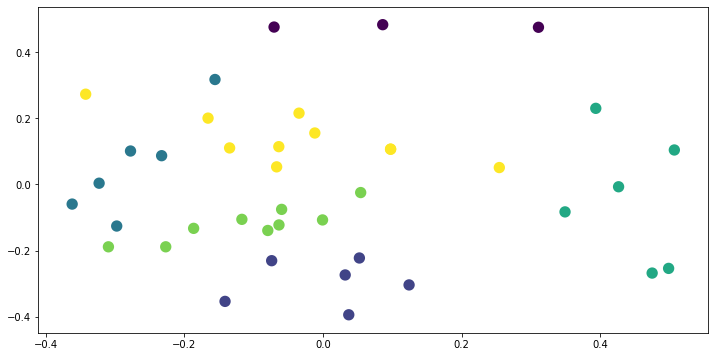

In [146]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components = 2) # TODO why 2?
Y_sklearn = sklearn_pca.fit_transform(X_train_vc.toarray())

number_of_components = 6 # For the five phases of dementia + not having dementia
gmm = GMM(n_components=number_of_components).fit(Y_sklearn)

prediction = gmm.predict(Y_sklearn)

plt.figure(figsize=(12, 6))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=40, cmap='viridis', linewidths=5)

# TODO, try K means and other multi-class classification as well

# Delete test and training data so we can get future random samples